In [1]:
raw_data = """
bc-pure.aot -g20 -vn30
Execution time: 34.302187 s
bc-stack.aot -g20 -vn30
Execution time: 37.148994 s
bc-ckpt.aot -g20 -vn30
Execution time: 42.571489 s
bc-ckpt-restore.aot -g20 -vn30
Execution time: 46.863408 s
bc-ckpt-br.aot -g20 -vn30
Execution time: 83.041481 s
bc-ckpt-restore-br.aot -g20 -vn30
Execution time: 132.552197 s
bfs-pure.aot -g20 -vn30
Execution time: 14.351933 s
bfs-stack.aot -g20 -vn30
Execution time: 14.996438 s
bfs-ckpt.aot -g20 -vn30
Execution time: 22.067379 s
bfs-ckpt-restore.aot -g20 -vn30
Execution time: 26.675362 s
bfs-ckpt-br.aot -g20 -vn30
Execution time: 37.981863 s
bfs-ckpt-restore-br.aot -g20 -vn30
Execution time: 57.842933 s
cc-pure.aot -g20 -vn30
Execution time: 18.300243 s
cc-stack.aot -g20 -vn30
Execution time: 18.588126 s
cc-ckpt.aot -g20 -vn30
Execution time: 25.973377 s
cc-ckpt-restore.aot -g20 -vn30
Execution time: 32.855094 s
cc-ckpt-br.aot -g20 -vn30
Execution time: 50.196314 s
cc-ckpt-restore-br.aot -g20 -vn30
Execution time: 66.00065 s
cc_sv-pure.aot -g20 -vn30
Execution time: 29.54862 s
cc_sv-stack.aot -g20 -vn30
Execution time: 32.782672 s
cc_sv-ckpt.aot -g20 -vn30
Execution time: 35.459035 s
cc_sv-ckpt-restore.aot -g20 -vn30
Execution time: 43.611647 s
cc_sv-ckpt-br.aot -g20 -vn30
Execution time: 81.889195 s
cc_sv-ckpt-restore-br.aot -g20 -vn30
Execution time: 102.327096 s
pr-pure.aot -g20 -vn30
Execution time: 35.934681 s
pr-stack.aot -g20 -vn30
Execution time: 36.047465 s
pr-ckpt.aot -g20 -vn30
Execution time: 40.882271 s
pr-ckpt-restore.aot -g20 -vn30
Execution time: 49.305484 s
pr-ckpt-br.aot -g20 -vn30
Execution time: 97.038582 s
pr-ckpt-restore-br.aot -g20 -vn30
Execution time: 116.394084 s
pr_spmv-pure.aot -g20 -vn30
Execution time: 34.385078 s
pr_spmv-stack.aot -g20 -vn30
Execution time: 34.121615 s
pr_spmv-ckpt.aot -g20 -vn30
Execution time: 39.312083 s
pr_spmv-ckpt-restore.aot -g20 -vn30
Execution time: 44.383572 s
pr_spmv-ckpt-br.aot -g20 -vn30
Execution time: 91.757583 s
pr_spmv-ckpt-restore-br.aot -g20 -vn30
Execution time: 105.780233 s
sssp-pure.aot -g20 -vn30
Execution time: 29.650004 s
sssp-stack.aot -g20 -vn30
Execution time: 29.38121 s
sssp-ckpt.aot -g20 -vn30
Execution time: 29.955115 s
sssp-ckpt-restore.aot -g20 -vn30
Execution time: 30.533785 s
sssp-ckpt-br.aot -g20 -vn30
Execution time: 87.525648 s
sssp-ckpt-restore-br.aot -g20 -vn30
Execution time: 96.116657 s
tc-pure.aot -g20 -n2
Execution time: 40.701657 s
tc-stack.aot -g20 -n2
Execution time: 40.94065 s
tc-ckpt.aot -g20 -n2
Execution time: 61.400616 s
tc-ckpt-restore.aot -g20 -n2
Execution time: 77.636297 s
tc-ckpt-br.aot -g20 -n2
Execution time: 140.699252 s
tc-ckpt-restore-br.aot -g20 -n2
Execution time: 192.589879 s
linpack-pure.aot
Execution time: 46.353292 s
linpack-stack.aot
Execution time: 46.375341 s
linpack-ckpt.aot
Execution time: 46.477809 s
linpack-ckpt-restore.aot
Execution time: 46.178991 s
linpack-ckpt-br.aot
Execution time: 187.976625 s
linpack-ckpt-restore-br.aot
Execution time: 256.99504 s
llama-pure.aot stories110M.bin
Execution time: 40.951077 s
llama-stack.aot stories110M.bin
Execution time: 41.380628 s
llama-ckpt.aot stories110M.bin
Execution time: 41.348782 s
llama-ckpt-restore.aot stories110M.bin
Execution time: 41.445202 s
llama-ckpt-br.aot stories110M.bin
Execution time: 100.465063 s
llama-ckpt-restore-br.aot stories110M.bin
Execution time: 105.872564 s
"""

p = []

lines = raw_data.split('\n')
for line in lines:
    if line == '':
        continue
    if line.startswith('Execution time'):
        time = line.split(' ')[2]
        p.append(time)
    else:
        aot = line.split(' ')[0].strip()
        program = aot.split('.')[0].split('-')[0].strip()
        arg = " ".join(line.split(' ')[1:]).strip()
        # print(aot, program, arg)

        if "ckpt.aot" in aot:
            variant = "ckpt"
        elif "pure.aot" in aot:
            variant = "pure"
        elif "stack.aot" in aot:
            variant = "stack"
        elif "ckpt-restore.aot" in aot:
            variant = "ckpt-restore"
        elif "ckpt-br.aot" in aot:
            variant = "ckpt-br"
        elif "ckpt-restore-br.aot" in aot:
            variant = "ckpt-restore-br"
        else:
            assert 0

        p.append((program, variant, arg))

data = {}
for i in range(len(p)):
    if i % 2 == 1:
        continue
    program, variant, arg = p[i]
    time = float(p[i+1])
    test = program + " " + arg
    if test not in data:
        data[test] = {}
    data[test][variant] = time

delta_data = {}
for k, v in data.items():
    pure = v["pure"]
    stack = v["stack"]
    ckpt = v["ckpt"]
    ckpt_restore = v["ckpt-restore"]
    ckpt_br = v["ckpt-br"]
    ckpt_restore_br = v["ckpt-restore-br"]

    stack = max(stack, pure)
    ckpt = max(ckpt, stack)
    ckpt_restore = max(ckpt_restore, ckpt)
    ckpt_br = max(ckpt_br, ckpt)
    ckpt_restore_br = max(ckpt_restore_br, ckpt_restore)

    assert pure <= stack
    assert stack <= ckpt
    assert ckpt <= ckpt_restore
    delta_data[k] = {
        "aot": pure,
        "stack": stack - pure,
        "ckpt": ckpt - stack,
        "ckpt-restore": ckpt_restore - ckpt,
        "ckpt-br": ckpt_br - ckpt_restore,
        "ckpt-restore-br": ckpt_restore_br - ckpt_br,
    }

In [2]:
len(delta_data)

10

In [3]:
# calculate average time of ckpt
aot_time = 0
stack_time = 0
ckpt_time = 0
ckpt_restore_time = 0
ckpt_br_time = 0
ckpt_restore_br_time = 0
for k, v in data.items():
    aot_time += v["pure"]
    stack_time += v["stack"]
    ckpt_time += v["ckpt"]
    ckpt_restore_time += v["ckpt-restore"]
    ckpt_br_time += v["ckpt-br"]
    ckpt_restore_br_time += v["ckpt-restore-br"]
print(aot_time + stack_time + ckpt_time + ckpt_restore_time + ckpt_br_time + ckpt_restore_br_time)
aot_time /= len(data)
stack_time /= len(data)
ckpt_time /= len(data)
ckpt_restore_time /= len(data)
ckpt_br_time /= len(data)
ckpt_restore_br_time /= len(data)
print("average time of aot:", aot_time)
print("average time of ckpt:", ckpt_time)
print("average time of ckpt-restore:", ckpt_restore_time)
print("average time of ckpt-br:", ckpt_br_time)
print("average time of ckpt-restore-br:", ckpt_restore_br_time)
print("stack/aot", stack_time / aot_time)
print("ckpt/aot", ckpt_time / aot_time)
print("ckpt-restore/aot", ckpt_restore_time / aot_time)
print("ckpt-br/aot", ckpt_br_time / aot_time)
print("ckpt-restore-br/aot", ckpt_restore_br_time / aot_time)

3672.2216480000006
average time of aot: 32.4478772
average time of ckpt: 38.5447956
average time of ckpt-restore: 43.9488842
average time of ckpt-br: 95.85716060000001
average time of ckpt-restore-br: 123.24713330000002
stack/aot 1.0224494408527902
ckpt/aot 1.1878988373390418
ckpt-restore/aot 1.3544455906656354
ckpt-br/aot 2.9541889600099944
ckpt-restore-br/aot 3.7983111357435737


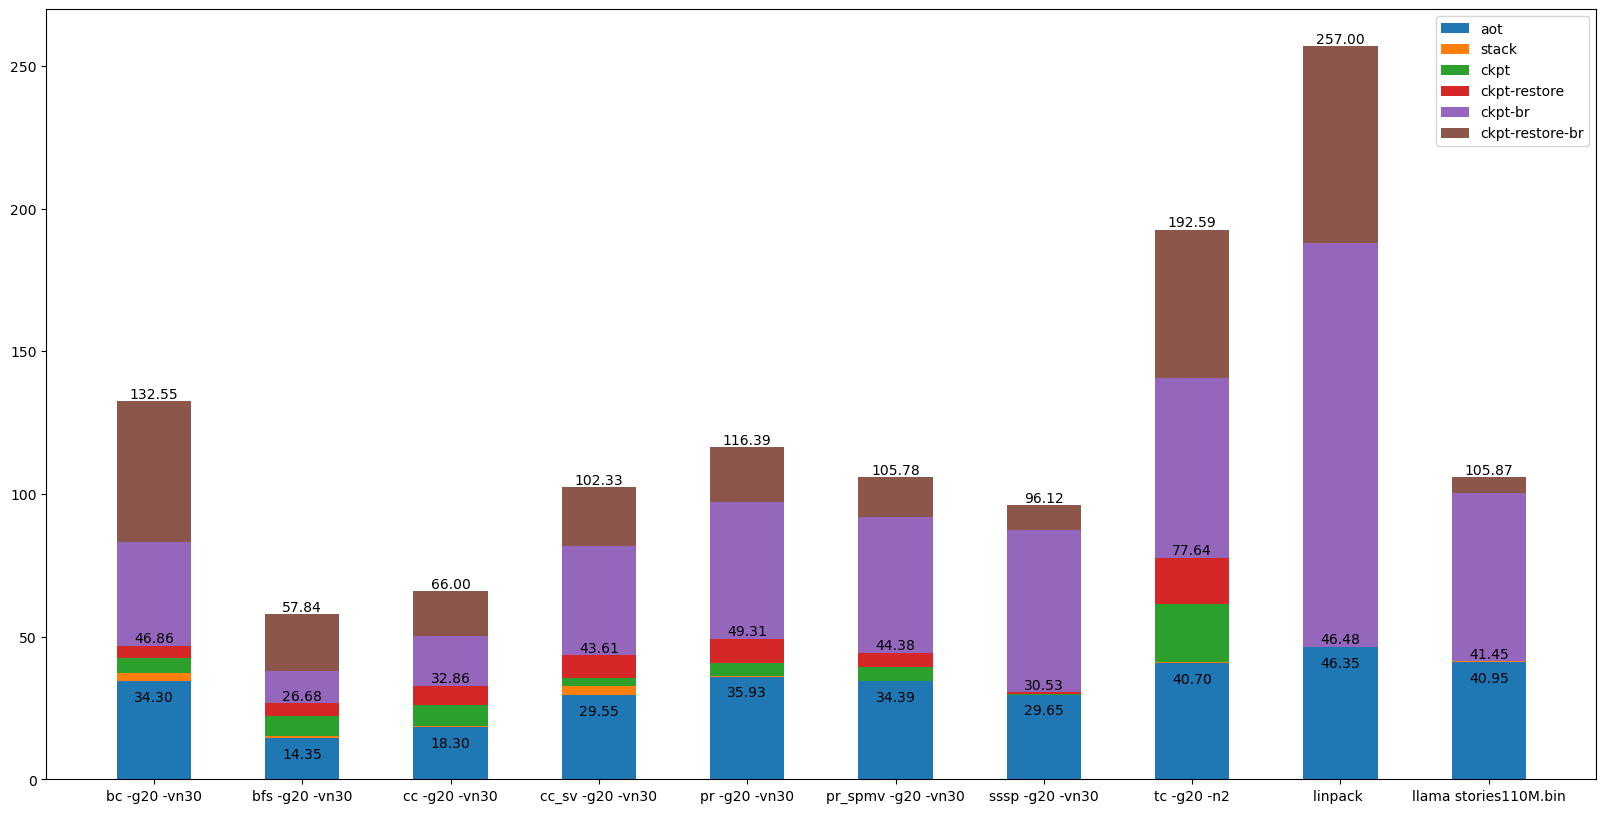

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams['text.usetex'] = True

keys = []
weights = {
    "aot": [],
    "stack": [],
    "ckpt": [],
    "ckpt-restore": [],
    "ckpt-br": [],
    "ckpt-restore-br": [],
}
for k, v in delta_data.items():
    keys.append(k)
    for w in weights:
        weights[w].append(v[w])
width = 0.5

fig, ax = plt.subplots(figsize=(20, 10))
bottom = np.zeros(len(keys))

for boolean, weight_count in weights.items():
    p = ax.bar(keys, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

# ax.set_title("Performance")
# add note at aot
for i in range(len(keys)):
    v = weights["aot"][i]
    ax.text(i, v - 8, "{:.2f}".format(v), ha='center', va='bottom')
# add note at stack
# for i in range(len(keys)):
#     ax.text(i, weights["aot"][i], "{:.2f}".format(weights["stack"][i]), ha='center', va='bottom')
# add note at ckpt
# for i in range(len(keys)):
#     ax.text(i, weights["aot"][i] + weights["stack"][i], "{:.2f}".format(weights["ckpt"][i]), ha='center', va='bottom')
# add note at ckpt-restore
for i in range(len(keys)):
    v = weights["aot"][i] + weights["stack"][i] + weights["ckpt"][i] + weights["ckpt-restore"][i]
    ax.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')
# add note at ckpt-br
# for i in range(len(keys)):
#     ax.text(i, weights["aot"][i] + weights["stack"][i] + weights["ckpt"][i] + weights["ckpt-restore"][i], "{:.2f}".format(weights["ckpt-br"][i]), ha='center', va='bottom')
# add note at ckpt-restore-br
for i in range(len(keys)):
    v = weights["aot"][i] + weights["stack"][i] + weights["ckpt"][i] + weights["ckpt-restore"][i] + weights["ckpt-br"][i] + weights["ckpt-restore-br"][i]
    ax.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')
# add note at total
# for i in range(len(keys)):
#     ax.text(i, weights["aot"][i] + weights["stack"][i] + weights["ckpt"][i] + weights["ckpt-restore"][i] + weights["ckpt-br"][i] + weights["ckpt-restore-br"][i], "{:.2f}".format(sum(weights.values())), ha='center', va='bottom')
# add text at upper left
ax.legend(loc="upper right")
# plt.show()
plt.savefig("performance.png", dpi=300)

In [2]:
# import matplotlib.pyplot as plt

# # draw pie chart for each test, show in one figure
# fig, axs = plt.subplots(4, 3, figsize=(15, 15))
# fig.tight_layout(pad=3.0)
# fig.suptitle('Execution time of each variant for each test')
# for i, (k, v) in enumerate(delta_data.items()):
#     row = i // 3
#     col = i % 3
#     print(row, col)
#     axs[row, col].pie(v.values(), labels=v.keys(), autopct='%1.1f%%')
#     axs[row, col].set_title(k)
# # save figure
# plt.savefig('pie.png', dpi=300)

In [1]:
# import matplotlib.pyplot as plt

# # draw pie chart for each test, show in one figure
# fig, axs = plt.subplots(4, 3, figsize=(15, 15))
# fig.tight_layout(pad=3.0)
# fig.suptitle('Execution time of each variant for each test')
# for i, (k, v) in enumerate(delta_data.items()):
#     v.pop("ckpt-br")
#     row = i // 3
#     col = i % 3
#     print(row, col)
#     axs[row, col].pie(v.values(), labels=v.keys(), autopct='%1.1f%%')
#     axs[row, col].set_title(k)
# # save figure
# plt.savefig('pie-without-ckpt-br.png', dpi=300)